## Prepare a model for glass classification

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
# Looking that sum of different elements sum upto 100. 
# Understanding that one type of glass corresponds to the different compositions of elements
# Refractive Index = the ratio of the speed of light in a vacuum to the ratio of the speed of light in a specific medium (glass)
data.iloc[:,1:-1].sum(axis=1).astype('int').value_counts()

99     185
100     29
dtype: int64

In [6]:
## Separating X and y variables
X = data.iloc[:, :-1]

y = data.iloc[: , -1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [8]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

params = dict(n_neighbors = np.array(range(1, 40)))
model = KNeighborsClassifier()
grid = GridSearchCV(model, param_grid= params, cv =8 )

grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)
print(grid.score)


0.6680911680911681
{'n_neighbors': 1}
<bound method BaseSearchCV.score of GridSearchCV(cv=8, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})>


In [57]:
grid.cv_results_

{'mean_fit_time': array([0.00319341, 0.00138998, 0.        , 0.00195286, 0.        ,
        0.00210339, 0.        , 0.        , 0.00025299, 0.00195354,
        0.        , 0.00195795, 0.00100598, 0.00195098, 0.00195256,
        0.        , 0.        , 0.003905  , 0.        , 0.00195247,
        0.00340065, 0.        , 0.00195321, 0.        , 0.0019528 ,
        0.00195214, 0.        , 0.003833  , 0.00195774, 0.        ,
        0.00195244, 0.00088036, 0.00195274, 0.        , 0.00396338,
        0.        , 0.00195688, 0.00198722, 0.00195318]),
 'std_fit_time': array([0.00245941, 0.00071291, 0.        , 0.00516677, 0.        ,
        0.00519844, 0.        , 0.        , 0.00066935, 0.00516859,
        0.        , 0.00518026, 0.00266157, 0.00516181, 0.00516598,
        0.        , 0.        , 0.00676366, 0.        , 0.00516575,
        0.00597955, 0.        , 0.00516772, 0.        , 0.00516662,
        0.00516488, 0.        , 0.00664053, 0.0051797 , 0.        ,
        0.00516567, 0.002

## It shows that when n_neighbours = 1, then the test score is highest. But ideally, when k=1, training score is almost 1, since one nearest point to a point is itself, and hence accuracy is 100% and it is called overfitting and it tends to decrease as we increases no. of k. Hence, further investigating and we will plot training and testing score together to come up with the optimum value of k.

In [58]:
# Defining the param grid for k - 1 to 31
grid = range(1,31)
grid_cv = {}
knn_acc = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

for k in grid:
    # for each value of k, evaluating model using cross validation
    model = KNeighborsClassifier(n_neighbors=k)
    # using cv = 5 ( K-fold) to calculate 5 scores for each value of k.
    scores = cross_val_score(model, X, y, cv =5, scoring='f1_weighted')
    result = scores.mean() # it is the mean of 5 testing scores of 5 folds. 
    error = 1-result
    # storing the scores for each value of k in a dictionary
    grid_cv.update({k:(result,error)})
    
    
    # To calculate the training score/error as well, we will use splitted dataset manually intead of cross validation
    model_1 = KNeighborsClassifier(n_neighbors=k)
    model_1.fit(X_train, y_train)
    train_score = model_1.score(X_train, y_train)
    test_score = model_1.score(X_test, y_test)
    # Storing training and testing score for each value of k
    knn_acc.update({k:(np.round(train_score,2), np.round(test_score,2))})
    

In [59]:
knn_acc

{1: (1.0, 0.78),
 2: (0.85, 0.67),
 3: (0.83, 0.74),
 4: (0.78, 0.67),
 5: (0.73, 0.67),
 6: (0.76, 0.63),
 7: (0.72, 0.63),
 8: (0.73, 0.61),
 9: (0.69, 0.63),
 10: (0.7, 0.63),
 11: (0.65, 0.61),
 12: (0.68, 0.61),
 13: (0.67, 0.61),
 14: (0.64, 0.69),
 15: (0.66, 0.65),
 16: (0.66, 0.67),
 17: (0.66, 0.67),
 18: (0.66, 0.69),
 19: (0.65, 0.69),
 20: (0.66, 0.69),
 21: (0.64, 0.67),
 22: (0.64, 0.67),
 23: (0.64, 0.65),
 24: (0.64, 0.67),
 25: (0.63, 0.65),
 26: (0.64, 0.63),
 27: (0.62, 0.65),
 28: (0.61, 0.59),
 29: (0.61, 0.57),
 30: (0.61, 0.59)}

In [76]:
grid_scores = pd.DataFrame(grid_cv, index=['score','error']).T
grid_scores.head()

,score,error
1,0.626559,0.373441
2,0.602553,0.397447
3,0.570934,0.429066
4,0.557364,0.442636
5,0.577174,0.422826


In [75]:
grid_scores.sort_values(['score'],ascending=False).head()

,score,error
1,0.626559,0.373441
2,0.602553,0.397447
5,0.577174,0.422826
6,0.574350,0.425650
3,0.570934,0.429066


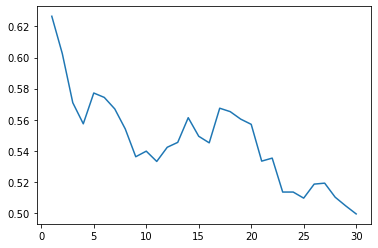

In [77]:
import matplotlib.pyplot as plt

plt.plot(grid_scores.index, grid_scores['score'])
plt.show()

In [79]:
scores_df = pd.DataFrame(knn_acc, index=['train_score','test_score']).T
scores_df.head()

,train_score,test_score
1,1.00,0.78
2,0.85,0.67
3,0.83,0.74
4,0.78,0.67
5,0.73,0.67


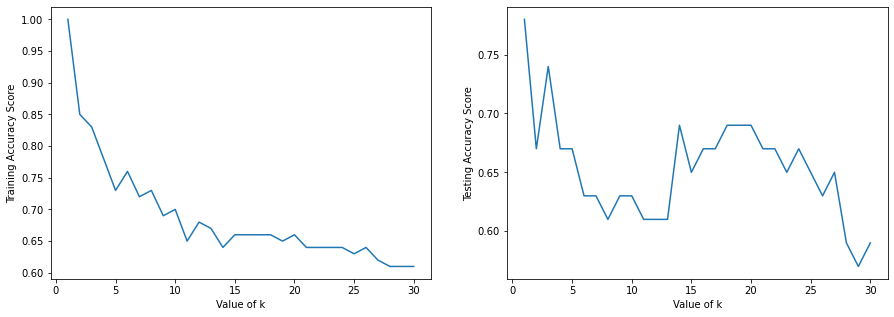

In [72]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(scores_df.index, scores_df['train_score'])
ax[0].set_xlabel('Value of k')
ax[0].set_ylabel('Training Accuracy Score')

ax[1].plot(scores_df.index, scores_df['test_score'])
ax[1].set_xlabel('Value of k')
ax[1].set_ylabel('Testing Accuracy Score')

plt.show()

### Usually, if training score = highest at vale k=1, then testing score should be low because of overfitting. But its's not the case, ignoring k=1. After k=1, testing score is highest at k=3

In [74]:
scores_df.sort_values(['test_score'], ascending=False).head()

,train_score,test_score
1,1.00,0.78
3,0.83,0.74
14,0.64,0.69
20,0.66,0.69
19,0.65,0.69


### Hence, preparing the final model with k=3

In [94]:
finalKNN_model = KNeighborsClassifier(n_neighbors=3)
finalKNN_model.fit(X, y)

final_score = cross_val_score(finalKNN_model, X, y, cv=8)

print(final_score.mean())


0.64494301994302


### KNN Model with 65% accuracy. 
### Taking a random data row and will try to predict its class from the upper build model. 

In [110]:
sample = data.sample()
sample

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
207,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7


In [111]:
sample_X = sample.iloc[:,0:-1]
sample_y = finalKNN_model.predict(sample_X)
sample_y

array([7], dtype=int64)